1.Schritt
----------
Ermittlung der Kennlinie des Abstandssensors
Mit den von python vorgegeben Funktionen zum berechnen des Mittelwerts und der Standardabweichung


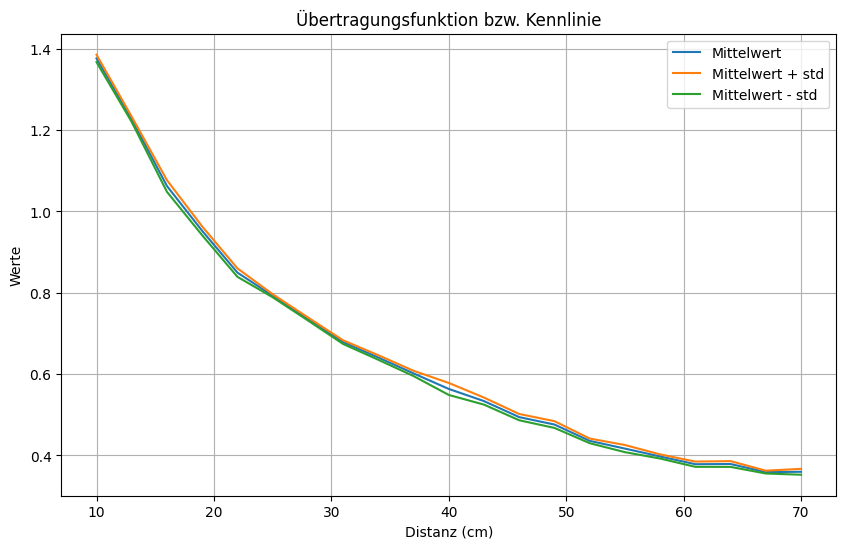

In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt

def replace_commas_with_periods_in_file(file_path):
    # Öffnen und lesen der ursprünglichen Datei
    with open(file_path, 'r') as file:
        data = file.read()

    # Ersetzen der Kommata durch Punkte
    data = data.replace(',', '.')

    # Überschreiben der ursprünglichen Datei mit den bearbeiteten Daten
    with open(file_path, 'w') as file:
        file.write(data)

def process_measurement_data(folder_path, start_distance, end_distance, step):
    distances = []
    mean_values = []
    std_values = []
    std_lower = []
    std_upper = []

    for distance in range(start_distance, end_distance + 1, step):
        file_name = f"{distance}cm.csv"
        file_path = os.path.join(folder_path, file_name)

        # Prüfen, ob die Datei existiert
        if not os.path.isfile(file_path):
            continue

        # Kommata in der Datei durch Punkte ersetzen
        replace_commas_with_periods_in_file(file_path)

        # Daten aus der CSV-Datei einlesen und überspringen der ersten Zeile
        data = np.genfromtxt(file_path, delimiter=';', skip_header=1, names=True)

        # sinnvolle Anzahl von Messungen (z.B. die ersten 500)
        data = data[:500]

        # Berechnen Sie Mittelwert und Standardabweichung für 'V'
        mean = np.mean(data['V'])
        std = np.std(data['V'])

        distances.append(distance)
        mean_values.append(mean)
        std_values.append(std)
        std_upper.append(np.mean(data['V']) + np.std(data['V']))
        std_lower.append(np.mean(data['V']) - np.std(data['V']))

    # Plotte die Ergebnisse
    plt.figure(figsize=(10, 6))
    plt.plot(distances, mean_values, label='Mittelwert')
    #plt.plot(distances, std_values, label='Standardabweichung')
    plt.plot(distances, std_upper, label= 'Mittelwert + std')
    plt.plot(distances, std_lower, label= 'Mittelwert - std')


    plt.xlabel('Distanz (cm)')
    plt.ylabel('Werte')
    plt.legend()
    plt.title('Übertragungsfunktion bzw. Kennlinie')
    plt.grid(True)
    plt.show()

# Aufruf der Funktion
process_measurement_data('/home/hermandi/Schreibtisch/hochschule/AIN3.1/SSS/InfrarotSensor/Messungen/', 10, 70, 3)




2.Schritt
------------
Modellierung der Kennlinie durch lineare Regression

Aus dem Grund, dass man keine lin. Regression auf exponentiale Funktionen anwenden kann machen wir folgendes:
Weil ln(e^x) = 1

/tmp/ipykernel_16012/1419802931.py:41: RuntimeWarning: divide by zero encountered in log
  logarithm_input = np.log(data['ms'])


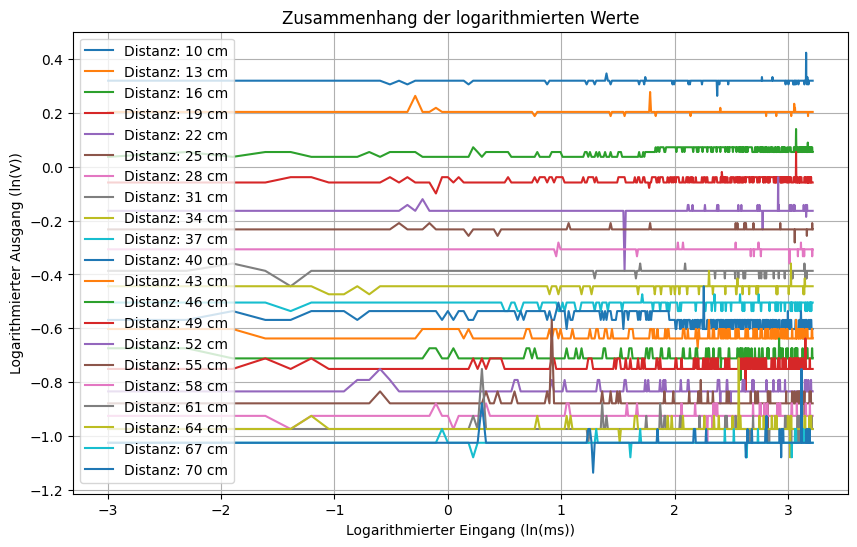

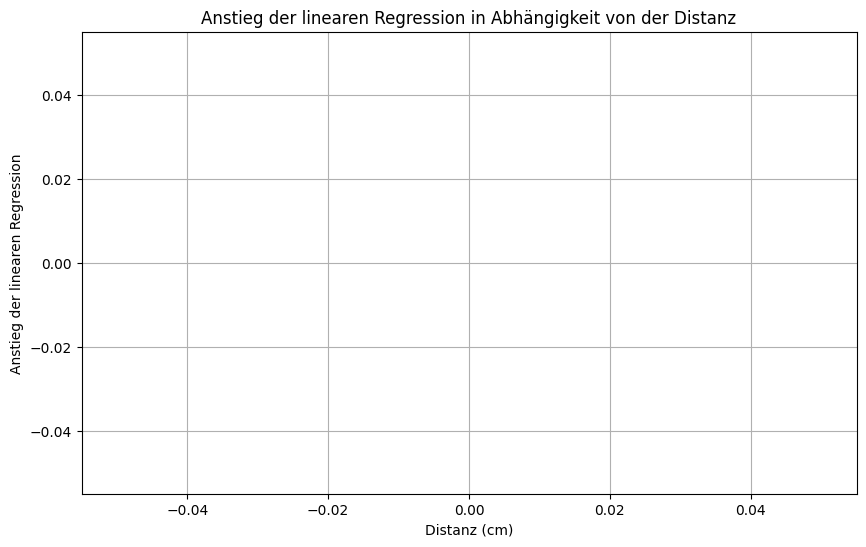

In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def replace_commas_with_periods_in_file(file_path):
    # Öffnen und lesen der ursprünglichen Datei
    with open(file_path, 'r') as file:
        data = file.read()

    # Ersetzen der Kommata durch Punkte
    data = data.replace(',', '.')

    # Überschreiben der ursprünglichen Datei mit den bearbeiteten Daten
    with open(file_path, 'w') as file:
        file.write(data)

def process_measurement_data(folder_path, start_distance, end_distance, step):
    distances = []
    logarithm_input_values = []
    logarithm_output_values = []

    for distance in range(start_distance, end_distance + 1, step):
        file_name = f"{distance}cm.csv"
        file_path = os.path.join(folder_path, file_name)

        # Prüfen, ob die Datei existiert
        if not os.path.isfile(file_path):
            continue

        # Kommata in der Datei durch Punkte ersetzen
        replace_commas_with_periods_in_file(file_path)

        # Daten aus der CSV-Datei einlesen und überspringen der ersten Zeile
        data = np.genfromtxt(file_path, delimiter=';', skip_header=1, names=True)

        # sinnvolle Anzahl von Messungen (z.B. die ersten 500)
        data = data[:500]

        # Berechnung der logarithmierten Eingangs- und Ausgangswerte
        logarithm_input = np.log(data['ms'])
        logarithm_output = np.log(data['V'])

        distances.append(distance)
        logarithm_input_values.append(logarithm_input)
        logarithm_output_values.append(logarithm_output)

    # Plotte den Zusammenhang der logarithmierten Werte
    plt.figure(figsize=(10, 6))
    for i in range(len(distances)):
        plt.plot(logarithm_input_values[i], logarithm_output_values[i], label=f'Distanz: {distances[i]} cm')
    plt.xlabel('Logarithmierter Eingang (ln(ms))')
    plt.ylabel('Logarithmierter Ausgang (ln(V))')
    plt.legend()
    plt.title('Zusammenhang der logarithmierten Werte')
    plt.grid(True)
    plt.show()

    # Führen Sie die lineare Regression durch
    slopes = []  # Hier speichern wir die Anstiege für jede Distanz
    for i in range(len(distances)):
        slope, intercept, r_value, p_value, std_err = linregress(logarithm_input_values[i], logarithm_output_values[i])
        slopes.append(slope)

    # Plotte die Anstiege in Abhängigkeit von der Distanz
    plt.figure(figsize=(10, 6))
    plt.plot(distances, slopes, marker='o', linestyle='-')
    plt.xlabel('Distanz (cm)')
    plt.ylabel('Anstieg der linearen Regression')
    plt.title('Anstieg der linearen Regression in Abhängigkeit von der Distanz')
    plt.grid(True)
    plt.show()

# Beispielaufruf der Funktion
process_measurement_data('/home/hermandi/Schreibtisch/hochschule/AIN3.1/SSS/InfrarotSensor/Messungen/', 10, 70, 3)
